In [29]:
import numpy as np
import skfda
from fpca import FPCABasis
from skfda.representation.basis import FDataBasis
from skfda.datasets._real_datasets import fetch_growth
from matplotlib import pyplot

In [30]:
dataset = fetch_growth()
fd = dataset['data']
y = dataset['target']

from here onwards is the implementation that should be inside the fit function

In [31]:
fd_data = np.squeeze(fd.data_matrix)

In [32]:
n_samples, n_points_discretization = fd_data.shape

In [33]:
k_estimated = fd_data @ np.transpose(fd_data)/n_samples

what weight vectors should we use?

In [34]:
print(fd.sample_points)

[array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,
        7.  ,  8.  ,  8.5 ,  9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 ,
       12.  , 12.5 , 13.  , 13.5 , 14.  , 14.5 , 15.  , 15.5 , 16.  ,
       16.5 , 17.  , 17.5 , 18.  ])]


In [35]:
weights = np.diff(fd.sample_points[0])
weights = np.append(weights, [weights[-1]])

In [36]:
weights_matrix = np.diag(weights)

In [37]:
final_matrix = fd_data @ np.sqrt(weights_matrix) / np.sqrt(n_samples)

In [38]:
u, s, vh = np.linalg.svd(final_matrix, full_matrices=True, compute_uv=True)

In [43]:
print(s.shape)

(31,)


In [41]:
principal_components = np.transpose(vh)


array([[-6.46348074e-02, -6.80259397e-02, -7.09800076e-02,
        -7.36136232e-02, -1.52001225e-01, -1.66509506e-01,
        -1.79517115e-01, -1.91597131e-01, -2.03391330e-01,
        -2.14297296e-01, -1.58737520e-01, -1.62341098e-01,
        -1.65953620e-01, -1.69411393e-01, -1.72901084e-01,
        -1.76607524e-01, -1.80405503e-01, -1.84322127e-01,
        -1.88237453e-01, -1.92028262e-01, -1.95624282e-01,
        -1.98937513e-01, -2.01862032e-01, -2.04288111e-01,
        -2.06225610e-01, -2.07614907e-01, -2.08673474e-01,
        -2.09402232e-01, -2.09908501e-01, -2.10248402e-01,
        -2.10603645e-01],
       [-4.44566582e-03, -1.39027900e-02, -1.98234062e-02,
        -2.36439972e-02, -7.00284155e-02, -6.38249167e-02,
        -8.46637858e-02, -1.23326597e-01, -1.67692729e-01,
        -1.48972480e-01, -1.00280297e-01, -1.03060109e-01,
        -1.06129666e-01, -1.17194973e-01, -1.30543371e-01,
        -1.59769501e-01, -1.95693665e-01, -2.26458587e-01,
        -2.35368517e-01, -2.07

In [45]:
components = fd.copy(data_matrix=vh[:2, :])

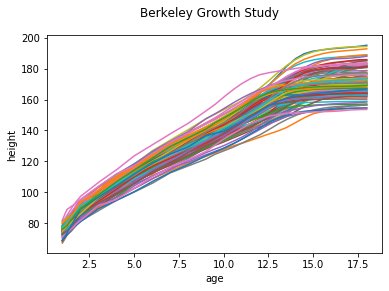

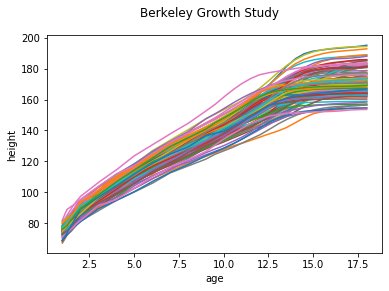

In [47]:
fd.plot()

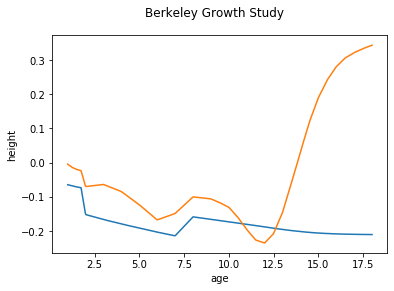

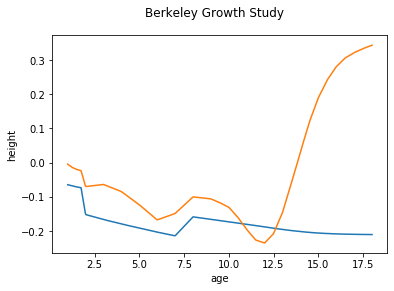

In [46]:
components.plot()

observe that we obtain the same by decomposing using eig directly

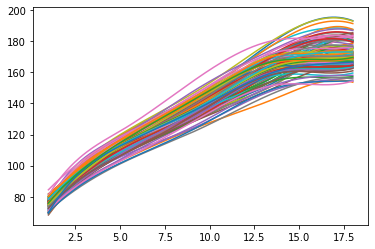

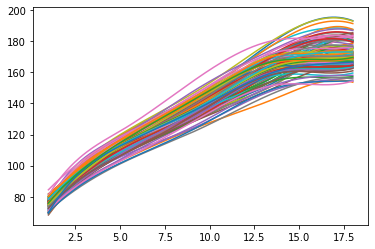

In [19]:
dataset = fetch_growth()
fd = dataset['data']
y = dataset['target']

basis = skfda.representation.basis.BSpline(n_basis=7)
basisfd = fd.to_basis(basis)
# print(basisfd.basis.gram_matrix())
# print(basis.gram_matrix())

basisfd.plot()


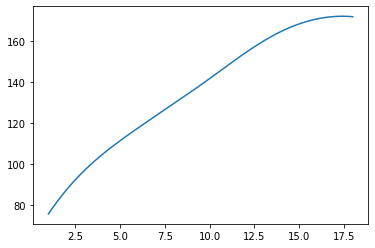

In [20]:

meanfd = basisfd.mean()
#
fpca = FPCABasis(2)
fpca.fit(basisfd)
#
# # fpca.components.plot()
# # pyplot.show()
#
meanfd.plot()
pyplot.show()
#

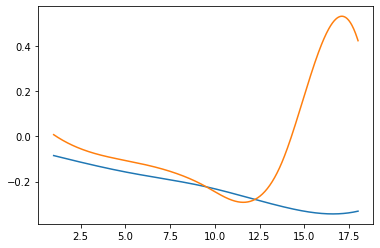

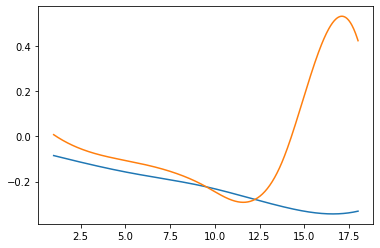

In [48]:
fpca.components.plot()

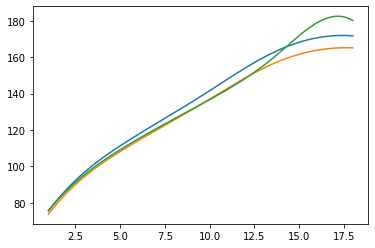

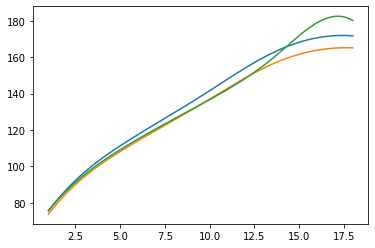

In [21]:

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 20 * fpca.components.coefficients[0, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 20 * fpca.components.coefficients[1, :]])

meanfd.plot()